<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft__nearest_k_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given a list of points, a central point, and an integer k, find the nearest k points from the central point.

For example, given the list of points [(0, 0), (5, 4), (3, 1)], the central point (1, 2), and k = 2, return [(0, 0), (3, 1)].

##Solution:
To solve this problem, we can follow these steps:
1. Calculate the Euclidean distance between each point in the list and the central point.
2. Sort the list of points based on the calculated distance.
3. Select the first `k` points from the sorted list as they are the nearest to the central point.



##Implementation:
Let's implement this solution in Python:

```python
from typing import List, Tuple
import math

def find_nearest_k_points(points: List[Tuple[int, int]], central_point: Tuple[int, int], k: int) -> List[Tuple[int, int]]:
    # Function to calculate Euclidean distance between two points
    def calculate_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
        return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
    
    # Calculate distance from each point to the central point and store in a list of tuples
    distances = [(point, calculate_distance(point, central_point)) for point in points]
    
    # Sort the list based on the distances
    distances.sort(key=lambda x: x[1])
    
    # Select the first k points from the sorted list
    nearest_k_points = [distance[0] for distance in distances[:k]]
    
    return nearest_k_points

# Given data
points = [(0, 0), (5, 4), (3, 1)]
central_point = (1, 2)
k = 2

# Find the nearest k points
nearest_k_points = find_nearest_k_points(points, central_point, k)
print(nearest_k_points)
```

This code defines a function `find_nearest_k_points` that:
- Takes a list of points, a central point, and an integer `k` as input.
- Calculates the Euclidean distance between each point in the list and the central point.
- Sorts the points based on their distance to the central point.
- Returns the first `k` points from the sorted list as the nearest points to the central point.

In [1]:
from typing import List, Tuple
import math

def find_nearest_k_points(points: List[Tuple[int, int]], central_point: Tuple[int, int], k: int) -> List[Tuple[int, int]]:
    # Function to calculate Euclidean distance between two points
    def calculate_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
        return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

    # Calculate distance from each point to the central point and store in a list of tuples
    distances = [(point, calculate_distance(point, central_point)) for point in points]

    # Sort the list based on the distances
    distances.sort(key=lambda x: x[1])

    # Select the first k points from the sorted list
    nearest_k_points = [distance[0] for distance in distances[:k]]

    return nearest_k_points

# Given data
points = [(0, 0), (5, 4), (3, 1)]
central_point = (1, 2)
k = 2

# Find the nearest k points
nearest_k_points = find_nearest_k_points(points, central_point, k)
print(nearest_k_points)


[(0, 0), (3, 1)]


##Extending to other Norms:
To extend the solution to allow passing a function pointer that points to a norm function, we'll first define several norm functions. These functions calculate distances between two points according to different norms (Euclidean, Manhattan, Infinum/Supremum, etc.). After defining these norm functions, we'll modify the `find_nearest_k_points` function to accept a norm function as an argument. This design makes the solution flexible to use different norms for calculating distances.

### Step 1: Define Norm Functions

Each norm function takes two points as input and returns the distance between them according to the specified norm.

1. **Euclidean Norm** (already defined in the previous example).
2. **Manhattan Norm** (L1 norm): The sum of the absolute differences of their Cartesian coordinates.
3. **Infinum (Chebyshev) Norm** (L∞ norm): The maximum absolute difference of their Cartesian coordinates.
4. **Other norms** can be defined similarly, but for the more complex norms like Friedman-Robertson-Walker-LeMaitre, a specific implementation based on their mathematical definitions would be necessary. Given the complexity and the specific domain knowledge required for such norms, they might not be straightforward to implement without further details. For the purpose of this example, we'll focus on the more commonly used norms.

### Step 2: Modify the `find_nearest_k_points` Function

The modified function will now accept a norm function as an argument, allowing us to specify how the distance is calculated.

### Implementation

Here is how you can implement this:

```python
from typing import List, Tuple, Callable
import math

# Norm functions
def euclidean_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

def manhattan_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
    return sum(abs(a - b) for a, b in zip(point1, point2))

def chebyshev_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
    return max(abs(a - b) for a, b in zip(point1, point2))

# Modified find_nearest_k_points function to accept a norm function
def find_nearest_k_points(points: List[Tuple[int, int]], central_point: Tuple[int, int], k: int, distance_func: Callable) -> List[Tuple[int, int]]:
    distances = [(point, distance_func(point, central_point)) for point in points]
    distances.sort(key=lambda x: x[1])
    return [distance[0] for distance in distances[:k]]

# Example usage
points = [(0, 0), (5, 4), (3, 1)]
central_point = (1, 2)
k = 2

# Using Manhattan distance
nearest_k_points = find_nearest_k_points(points, central_point, k, manhattan_distance)
print("Manhattan:", nearest_k_points)

# Using Chebyshev distance
nearest_k_points = find_nearest_k_points(points, central_point, k, chebyshev_distance)
print("Chebyshev:", nearest_k_points)
```



In [2]:
from typing import List, Tuple, Callable
import math

# Norm functions
def euclidean_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

def manhattan_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
    return sum(abs(a - b) for a, b in zip(point1, point2))

def chebyshev_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
    return max(abs(a - b) for a, b in zip(point1, point2))

# Modified find_nearest_k_points function to accept a norm function
def find_nearest_k_points(points: List[Tuple[int, int]], central_point: Tuple[int, int], k: int, distance_func: Callable) -> List[Tuple[int, int]]:
    distances = [(point, distance_func(point, central_point)) for point in points]
    distances.sort(key=lambda x: x[1])
    return [distance[0] for distance in distances[:k]]

# Example usage
points = [(0, 0), (5, 4), (3, 1)]
central_point = (1, 2)
k = 2

# Using Manhattan distance
nearest_k_points = find_nearest_k_points(points, central_point, k, manhattan_distance)
print("Manhattan:", nearest_k_points)

# Using Chebyshev distance
nearest_k_points = find_nearest_k_points(points, central_point, k, chebyshev_distance)
print("Chebyshev:", nearest_k_points)


Manhattan: [(0, 0), (3, 1)]
Chebyshev: [(0, 0), (3, 1)]


To have the modified `find_nearest_k_points` function output both the nearest points and their distances to the central point as measured by the chosen norm, we can adjust the function to return a list of tuples. Each tuple will contain a point and its distance to the central point. This way, we maintain the flexibility of using different norm functions while also providing the requested distance information.

Let's implement these changes:

```python
from typing import List, Tuple, Callable
import math

# Norm functions
def euclidean_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

def manhattan_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
    return sum(abs(a - b) for a, b in zip(point1, point2))

def chebyshev_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
    return max(abs(a - b) for a, b in zip(point1, point2))

# Modified find_nearest_k_points function to include distances
def find_nearest_k_points_with_distance(points: List[Tuple[int, int]], central_point: Tuple[int, int], k: int, distance_func: Callable) -> List[Tuple[Tuple[int, int], float]]:
    # Calculate distance for each point and store both point and distance
    distances = [(point, distance_func(point, central_point)) for point in points]
    
    # Sort based on distance
    distances.sort(key=lambda x: x[1])
    
    # Select the first k points and their distances
    nearest_k_points_with_distances = distances[:k]
    
    return nearest_k_points_with_distances

# Example usage
points = [(0, 0), (5, 4), (3, 1)]
central_point = (1, 2)
k = 2

# Using Manhattan distance
nearest_k_points_with_distances = find_nearest_k_points_with_distance(points, central_point, k, manhattan_distance)
print("Manhattan distances:", nearest_k_points_with_distances)

# Using Chebyshev distance
nearest_k_points_with_distances = find_nearest_k_points_with_distance(points, central_point, k, chebyshev_distance)
print("Chebyshev distances:", nearest_k_points_with_distances)
```

This version of the function, `find_nearest_k_points_with_distance`, not only identifies the nearest `k` points to the central point using the specified norm but also returns the distance of each of these points from the central point, allowing for a more informative output.

In [3]:
from typing import List, Tuple, Callable
import math

# Norm functions
def euclidean_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

def manhattan_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
    return sum(abs(a - b) for a, b in zip(point1, point2))

def chebyshev_distance(point1: Tuple[int, int], point2: Tuple[int, int]) -> float:
    return max(abs(a - b) for a, b in zip(point1, point2))

# Modified find_nearest_k_points function to include distances
def find_nearest_k_points_with_distance(points: List[Tuple[int, int]], central_point: Tuple[int, int], k: int, distance_func: Callable) -> List[Tuple[Tuple[int, int], float]]:
    # Calculate distance for each point and store both point and distance
    distances = [(point, distance_func(point, central_point)) for point in points]

    # Sort based on distance
    distances.sort(key=lambda x: x[1])

    # Select the first k points and their distances
    nearest_k_points_with_distances = distances[:k]

    return nearest_k_points_with_distances

# Example usage
points = [(0, 0), (5, 4), (3, 1)]
central_point = (1, 2)
k = 2

# Using Manhattan distance
nearest_k_points_with_distances = find_nearest_k_points_with_distance(points, central_point, k, manhattan_distance)
print("Manhattan distances:", nearest_k_points_with_distances)

# Using Chebyshev distance
nearest_k_points_with_distances = find_nearest_k_points_with_distance(points, central_point, k, chebyshev_distance)
print("Chebyshev distances:", nearest_k_points_with_distances)


Manhattan distances: [((0, 0), 3), ((3, 1), 3)]
Chebyshev distances: [((0, 0), 2), ((3, 1), 2)]


To find the locus of all points equidistant from a given point (the focus) and a given line (the directrix) using the Euclidean distance, you are essentially describing a parabola in geometric terms. This is because, by definition, a parabola is the set of all points in a plane that are equidistant from a fixed point (focus) and a fixed line (directrix).

Let's formalize this and then draw it:

### Defining the Problem

- **Focus (\(F\))**: A fixed point in the plane.
- **Directrix**: A fixed line in the plane.
- **Parabola**: The locus of points (\(P\)) such that the distance from \(P\) to the focus (\(F\)) is equal to the perpendicular distance from \(P\) to the directrix.

Assuming the focus (\(F\)) is at coordinates \((f_x, f_y)\) and the directrix is the line \(y = d_y\) (for simplicity, we choose a horizontal directrix), the equation of the parabola can be derived. However, instead of delving into the algebraic derivation, let's focus on how we can visualize this setup.

### Drawing the Parabola

To draw the parabola and illustrate the concept, we can use a Python package like Matplotlib. We'll generate a series of points that satisfy the parabolic condition and plot them. This approach avoids the need for an explicit algebraic equation of the parabola (though it could be derived if needed for specific focuses and directrices).

Let's proceed with an example where the focus is at \((0, 1)\) and the directrix is the line \(y = -1\).

```python
import matplotlib.pyplot as plt
import numpy as np

# Focus coordinates
fx, fy = 0, 1
# Directrix y-coordinate
dy = -1

# Generate x values
x_values = np.linspace(-10, 10, 400)
# Calculate corresponding y values for the parabola
y_values = [(x**2 + fy**2 - dy**2) / (2 * (fy - dy)) for x in x_values]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Parabola: Locus of points equidistant from focus and directrix')

# Mark the focus
plt.scatter([fx], [fy], color='red', label='Focus')
# Draw the directrix
plt.axhline(y=dy, color='green', linestyle='--', label='Directrix')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Parabola: Points Equidistant from a Focus and a Directrix')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
```

This code:
- Defines the focus and directrix.
- Generates a set of \(x\) values that span the region of interest.
- Calculates the corresponding \(y\) values for the parabola using the geometric condition of equal distances.
- Plots the parabola, marking the focus and drawing the directrix line.

This visualization illustrates the geometric property defining a parabola and is a simple example of how algebraic geometry concepts can be explored and visualized using Python.

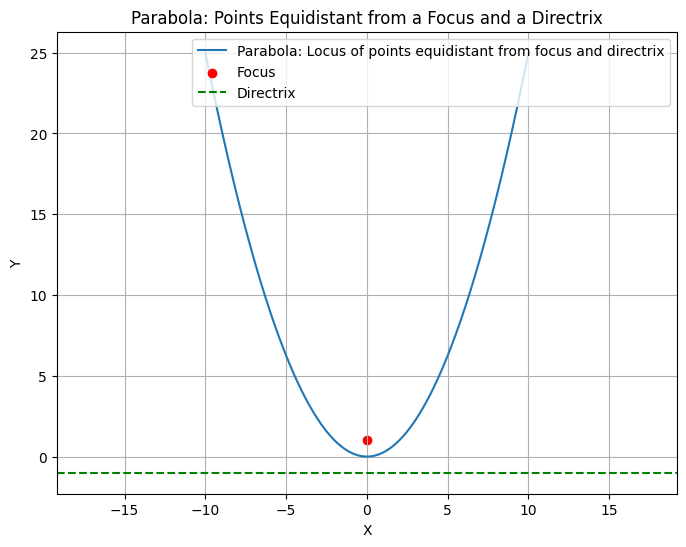

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Focus coordinates
fx, fy = 0, 1
# Directrix y-coordinate
dy = -1

# Generate x values
x_values = np.linspace(-10, 10, 400)
# Calculate corresponding y values for the parabola
y_values = [(x**2 + fy**2 - dy**2) / (2 * (fy - dy)) for x in x_values]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Parabola: Locus of points equidistant from focus and directrix')

# Mark the focus
plt.scatter([fx], [fy], color='red', label='Focus')
# Draw the directrix
plt.axhline(y=dy, color='green', linestyle='--', label='Directrix')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Parabola: Points Equidistant from a Focus and a Directrix')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


To explore the concept of a parabola defined by a Manhattan norm (L1 norm) for distances, we'll adjust our approach. The Manhattan distance between two points \((x_1, y_1)\) and \((x_2, y_2)\) is given by \(|x_1 - x_2| + |y_1 - y_2|\). When defining a parabola using the Manhattan norm, the condition is that for any point \(P(x, y)\) on the parabola, the Manhattan distance from \(P\) to the focus \(F(f_x, f_y)\) is equal to the Manhattan distance from \(P\) to the directrix \(y = d_y\).

The geometric interpretation and construction of such a parabola are less straightforward than with the Euclidean norm because the Manhattan norm induces a diamond-shaped (or square rotated by 45 degrees) equidistance contour, as opposed to the circular one induced by the Euclidean norm.

Let's proceed with a conceptual approach to visualize a "parabola" defined under the Manhattan norm:

1. **Define the focus** and **directrix**.
2. For a range of \(x\) values, **calculate \(y\) values** that satisfy the Manhattan distance condition for a parabola. Given the non-standard definition of this parabola, we'll need a method to compute \(y\) values that approximate the condition.
3. **Plot the points** that satisfy this condition to visualize the "parabola".

### Implementation

Given the complex nature of this problem, the calculation of \(y\) values for each \(x\) to satisfy the Manhattan norm condition will involve an iterative or analytical method to find points equidistant from the focus and directrix.

This approach involves iterating over a grid of points, checking the Manhattan distance condition, and plotting points that satisfy it. However, this method is not as straightforward or mathematically clean as solving for \(y\) directly in the Euclidean case.

For simplicity, let's start with a conceptual Python script to attempt this visualization:

```python
import matplotlib.pyplot as plt
import numpy as np

# Define the Manhattan distance function
def manhattan_distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

# Focus and directrix definition
fx, fy = 0, 1  # Focus point
dy = -1  # Directrix y-coordinate

# Generate a dense grid of points
x_range = np.linspace(-10, 10, 1000)
y_range = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x_range, y_range)

# Calculate Manhattan distance to the focus and directrix for each point
distance_to_focus = manhattan_distance(X, Y, fx, fy)
distance_to_directrix = abs(Y - dy)

# Find points where distances are approximately equal
parabola_points = np.isclose(distance_to_focus, distance_to_directrix, atol=0.1)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[parabola_points], Y[parabola_points], color='blue', s=1, label='Manhattan "Parabola"')

# Mark the focus
plt.scatter([fx], [fy], color='red', label='Focus')
# Draw the directrix
plt.axhline(y=dy, color='green', linestyle='--', label='Directrix')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Manhattan "Parabola": Equidistant Points from Focus and Directrix')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
```

This script attempts to visualize a "parabola" under the Manhattan norm by:
- Calculating distances using the Manhattan norm.
- Identifying points that satisfy the equal distance condition to the focus and directrix.

Note that the resulting figure will likely not resemble a traditional parabola due to the nature of the Manhattan distance, illustrating the interesting geometries that arise from alternative distance metrics. This approach provides a basic framework for exploring such geometries, though the precise mathematical definition and properties would require further exploration beyond simple visualization.

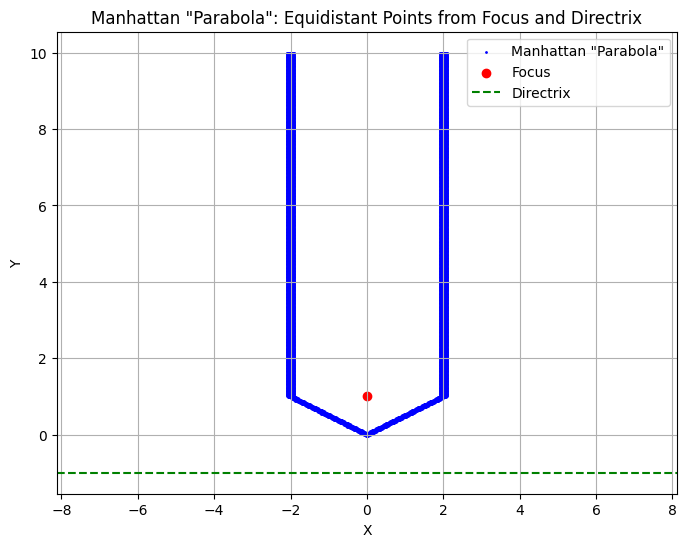

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the Manhattan distance function
def manhattan_distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

# Focus and directrix definition
fx, fy = 0, 1  # Focus point
dy = -1  # Directrix y-coordinate

# Generate a dense grid of points
x_range = np.linspace(-10, 10, 1000)
y_range = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x_range, y_range)

# Calculate Manhattan distance to the focus and directrix for each point
distance_to_focus = manhattan_distance(X, Y, fx, fy)
distance_to_directrix = abs(Y - dy)

# Find points where distances are approximately equal
parabola_points = np.isclose(distance_to_focus, distance_to_directrix, atol=0.1)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[parabola_points], Y[parabola_points], color='blue', s=1, label='Manhattan "Parabola"')

# Mark the focus
plt.scatter([fx], [fy], color='red', label='Focus')
# Draw the directrix
plt.axhline(y=dy, color='green', linestyle='--', label='Directrix')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Manhattan "Parabola": Equidistant Points from Focus and Directrix')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


Using a "turtle geometry" approach could indeed offer a more intuitive way to explore and visualize geometrical concepts, especially those that deviate from standard Euclidean geometry, such as geometries defined by the Manhattan norm. Turtle graphics, famously associated with the Logo programming language, allow users to draw shapes and figures by moving a "turtle" around the screen with simple commands (e.g., move forward, turn right). This method can be particularly engaging for educational purposes and for exploring mathematical concepts through visual programming.

For the specific task of drawing a "parabola" defined by Manhattan distances to a focus and a directrix, using turtle graphics would involve algorithmically determining the turtle's movements to trace out the set of points that satisfy the Manhattan distance condition. However, because turtle graphics are inherently step-based and direction-oriented, directly implementing complex geometric conditions (like those defining a Manhattan "parabola") might not be straightforward. The challenge lies in translating the condition of equal Manhattan distances into a series of turtle movements.

### Conceptual Approach with Turtle Graphics

While a direct implementation in Logo or a similar turtle graphics environment might be complex without explicit support for Manhattan distance calculations, we can conceptualize an approach using turtle graphics in Python's Turtle module. This approach would involve:

1. **Estimating the path** of the "parabola" through iterative exploration, checking distances at each step.
2. **Drawing the path** with turtle graphics by moving and rotating the turtle to trace the estimated "parabola".

### Python Turtle Example

Here's a simplified conceptual example using Python's Turtle graphics to draw a standard parabola. Adapting it to a Manhattan "parabola" would require custom logic to follow the unique shape that Manhattan distances would produce.

```python
import turtle

# Setup turtle screen
screen = turtle.Screen()
screen.title("Turtle Geometry Parabola")

# Create turtle
t = turtle.Turtle()
t.speed(0)  # Fastest drawing speed

# Draw a simple parabola by moving the turtle (conceptual example)
t.penup()
for x in range(-100, 101):
    y = x**2 / 100  # Simple parabola equation for demonstration
    t.goto(x, y)
    t.pendown()

# Keep the window open until it's closed by the user
turtle.done()
```

### Adapting to Manhattan "Parabola"

To adapt this to draw a figure based on Manhattan distances, one would need to develop a method to calculate the next step of the turtle based on the Manhattan distance condition. This could involve:
- Defining a grid and checking each point's Manhattan distance to the focus and the directrix.
- Moving the turtle to points that satisfy the condition of being equidistant to the focus and the directrix, according to the Manhattan metric.

Given the complexity and the unique challenges posed by non-Euclidean conditions, the direct implementation would require careful planning and potentially a custom algorithm to navigate the turtle through the desired path.

Although turtle graphics provide a powerful tool for educational and exploratory programming, the specific task of drawing non-standard geometrical figures like a Manhattan "parabola" might be more complex and require a more analytical approach to determine the points or path before attempting to draw it with turtle graphics.

Exploring geometries defined by different norms, such as the Infinum (Chebyshev) norm, and extending this exploration to various shaped spaces and function spaces, opens up a fascinating area of mathematical inquiry. Each norm imposes its own unique characteristics on geometrical shapes, and visualizing these differences can provide deep insights into the nature of space and distance.

### Parabolas Under Different Norms

- **Euclidean Norm (L2 norm)**: Defines a parabola traditionally understood in Cartesian coordinates, where the distance is the shortest path between two points (straight line in Euclidean space).

- **Manhattan Norm (L1 norm)**: Would create a "parabola" that reflects paths that move only horizontally and vertically. The equidistant locus from a point (focus) and a line (directrix) under the Manhattan norm would result in shapes that have corners and straight edges, diverging significantly from the smooth curve of a Euclidean parabola.

- **Chebyshev (Infinum, L∞ norm)**: Defines distance as the maximum of the absolute differences of their coordinates. The "parabola" under this norm would also have a distinct shape, likely featuring a diamond or square-like path that expands as one moves away from the focus, reflecting the uniformity of the Chebyshev distance in all directions.

### Visualizing Different Norms

Visualizing these geometries requires calculating sets of points that are equidistant (under the chosen norm) from a focus and a directrix. For norms other than Euclidean, this often results in non-smooth, polygonal shapes.

### Exploring Shaped Spaces and Function Spaces

Moving beyond traditional geometrical spaces to explore shaped spaces (such as spaces curved by gravity in general relativity) and function spaces (spaces where each point represents a function) involves more abstract concepts. In these spaces, "distance" can take on meanings beyond physical separation, reflecting differences in shape, function behavior, or other mathematical properties.

For instance, in function spaces, the concept of distance may pertain to how similar or different two functions are across their domains, which can be measured in various ways (e.g., maximum absolute difference, integral of the square of the difference, etc.).

### Visualizing with Turtle Graphics

While turtle graphics are excellent for exploring Euclidean geometry, they're less naturally suited to directly visualizing non-Euclidean geometries or abstract mathematical spaces. However, one can still use turtle graphics creatively to illustrate concepts from these areas by focusing on simpler, more tangible representations.

For example, to draw shapes reflecting different norms, one might use turtle graphics to plot points or trace paths that represent the boundary of a shape defined by a specific distance from a central point under various norms.

### Engaging with Mathematical Concepts

Engaging with these concepts in the mode of the book by diSessa and others involves integrating computational tools to explore mathematical ideas actively. Tools like Python (with libraries such as NumPy, Matplotlib, and sympy for algebraic manipulations) can be very powerful for this purpose, enabling the visualization and manipulation of mathematical concepts across different norms and spaces.

To further explore these ideas, one might consider projects like:
- Implementing algorithms to calculate and visualize geometries under various norms.
- Simulating physical spaces influenced by non-Euclidean geometries, such as those found in general relativity.
- Developing interactive simulations that allow users to manipulate parameters and observe the effects on geometrical shapes and function spaces in real-time.

These endeavors can provide a deeper understanding of the nature of mathematical spaces and the way different norms and mathematical concepts shape our understanding of distance, shape, and function.

Running Logo-style turtle graphics in a Jupyter notebook or Colab environment requires a bit of a workaround since these environments don't natively support the interactive, real-time graphical output typical of turtle graphics. However, you can simulate turtle graphics in these notebook interfaces using Matplotlib to draw lines and shapes, mimicking the turtle's movements.

To illustrate turtle graphics in a notebook-like Colab, you can use a class that keeps track of the turtle's state (position and heading) and plots the movements with Matplotlib. This approach allows you to create drawings similar to what you'd achieve with turtle graphics but compatible with notebook environments.

### Simulated Turtle Graphics with Matplotlib

Below is an example of how you can simulate turtle graphics in Colab or Jupyter using Matplotlib:

```python
import matplotlib.pyplot as plt
import numpy as np

class NotebookTurtle:
    def __init__(self):
        self.position = np.array([0.0, 0.0])
        self.heading = 0.0
        self.lines = []

    def forward(self, distance):
        # Calculate the new position based on the current heading and distance
        direction = np.array([np.cos(np.radians(self.heading)), np.sin(np.radians(self.heading))])
        new_position = self.position + distance * direction
        self.lines.append((self.position, new_position))
        self.position = new_position

    def right(self, angle):
        self.heading -= angle

    def left(self, angle):
        self.heading += angle

    def plot(self):
        plt.figure(figsize=(8, 8))
        for line in self.lines:
            plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], 'b-')
        plt.axis('equal')
        plt.grid(True)
        plt.show()

# Create a turtle and draw a square
turtle = NotebookTurtle()

# Example: Draw a square
for _ in range(4):
    turtle.forward(100)
    turtle.right(90)

turtle.plot()
```

This `NotebookTurtle` class simulates basic turtle movements (`forward`, `right`, `left`) and plots the drawing with Matplotlib. The `plot` method generates a plot showing all the lines drawn by the turtle.

### Adapting to Different Geometries and Norms

To explore different geometries or "parabolas" defined by various norms (like Manhattan or Chebyshev) using this simulated turtle graphics approach, you would calculate the path points according to the specific geometric or mathematical conditions you're interested in. Then, use the `forward`, `right`, and `left` methods to move the turtle through those points, drawing the shape.

This approach provides a flexible way to visualize mathematical concepts and geometric shapes directly within Colab, Jupyter, or similar notebook interfaces, even though it doesn't capture the real-time, interactive nature of traditional turtle graphics.

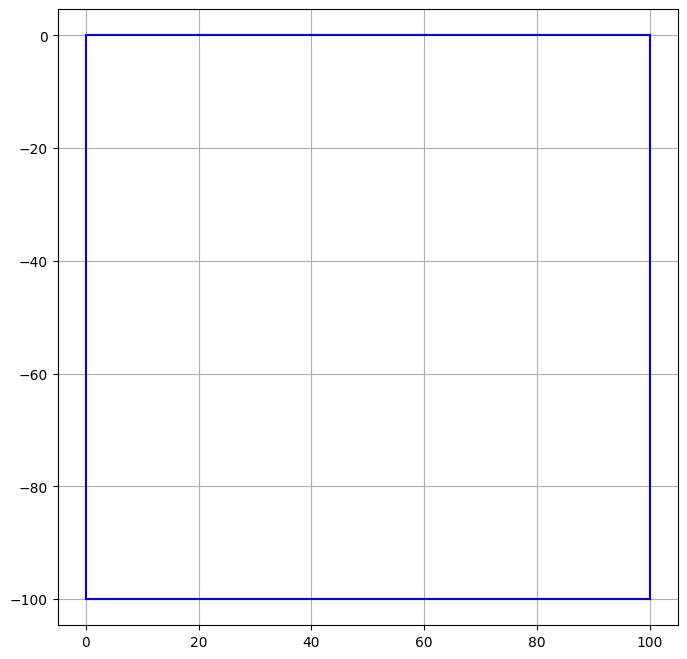

In [8]:
import matplotlib.pyplot as plt
import numpy as np

class NotebookTurtle:
    def __init__(self):
        self.position = np.array([0.0, 0.0])
        self.heading = 0.0
        self.lines = []

    def forward(self, distance):
        # Calculate the new position based on the current heading and distance
        direction = np.array([np.cos(np.radians(self.heading)), np.sin(np.radians(self.heading))])
        new_position = self.position + distance * direction
        self.lines.append((self.position, new_position))
        self.position = new_position

    def right(self, angle):
        self.heading -= angle

    def left(self, angle):
        self.heading += angle

    def plot(self):
        plt.figure(figsize=(8, 8))
        for line in self.lines:
            plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], 'b-')
        plt.axis('equal')
        plt.grid(True)
        plt.show()

# Create a turtle and draw a square
turtle = NotebookTurtle()

# Example: Draw a square
for _ in range(4):
    turtle.forward(100)
    turtle.right(90)

turtle.plot()


## Extending to Other Coordinate Systems

To further extend this solution to other coordinate systems and dimensions, we'd need to:
- **Generalize the norm functions** to handle points in N-dimensional space.
- **Consider the specific mathematical properties** of each coordinate system (like spacetime coordinates) when implementing their respective norm functions.

For complex coordinate systems, such as those used in general relativity (e.g., Friedman-Robertson-Walker-LeMaitre), we would need to incorporate the specific metrics that define distances in these spaces. Implementing such norms goes beyond the scope of this solution due to the specialized knowledge required and the complexity of the calculations.

This approach allows for a great deal of flexibility, enabling the calculation of distances in various mathematical and physical contexts by simply defining and passing the appropriate norm function.